In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import os

current_dir = os.getcwd()
phrase = "QuantitativeFinance"
target_path = current_dir.split(phrase)[0] + phrase
os.chdir(target_path)
print(os.getcwd())

np.set_printoptions(suppress=True)

from functions import binomial_coefficient

%load_ext autoreload
%autoreload 2


c:\OneDrive\Pulpit\QuantitativeFinance


### **Sources**

In [ ]:
# - https://en.wikipedia.org/wiki/Central_limit_theorem
# - https://en.wikipedia.org/wiki/Binomial_distribution
# - https://www.youtube.com/watch?v=zeJD6dqJ5lo


### **Theorem**

In [ ]:
# Central limit theorem states that, under conditions, the distribution of a normalized version of the sample mean 
# converges to a standard normal distribution, even if the original variables are not normally distributed

# Let's denote a statistical sample of size N as x1, x2, ..., xN from a population with expected value of mu and finite, 
# positive variance of sigma^2. x_mean is the mean of the sample. Then when N tends to infinity, the limit of the 
# distribution of (x_mean - mu) * sqrt(N) is a normal distribution with mean of 0 and variance sigma^2

# In other words, suppose that a large sample of observations is obtained, each observation being randomly produced 
# in a way that does not depend on the values of the other observations, and the average (arithmetic mean) of the 
# observed values is computed. If this procedure is performed many times, resulting in a collection of observed 
# averages, the central limit theorem says that if the sample size is large enough, the probability distribution
# of these averages will closely approximate a normal distribution


### **Binomial distribution introduction**

In [ ]:
# Prepare a sample
n, p = 10, 0.6  # n - number of trials (one can have 0, 1, 2, ..., 10 successes), p - probability of success in each trial

print(f'Theoretical values: E(X): {np.round(n*p, 4)}, Var(X): {np.round(n*p*(1-p), 4)}')

binomial_sample = np.random.binomial(n=n, p=p, size=2**17)
print(f'Empirical values: mean: {binomial_sample.mean():.4f}, variance: {binomial_sample.var():.4f}')


Theoretical values: E(X): 6.0, Var(X): 2.4
Empirical values: mean: 5.9952, variance: 2.3975


#### Assuming probability of success is 60%, there are following probabilities of achieving given number of successes:


In [16]:
prob_array = np.zeros([n+1])
for k in range(n+1):
    prob = binomial_coefficient(n, k) * p**k * (1-p)**(n-k)
    prob_array[k] = prob
    
    print(f'Number of successes: {k}, theoretical probability: {prob:.4f}, proportion of successes in '
          f'sample: {len(binomial_sample[binomial_sample == k]) / len(binomial_sample):.4f}')
    

Number of successes: 0, theoretical probability: 0.0001, proportion of successes in sample: 0.0001
Number of successes: 1, theoretical probability: 0.0016, proportion of successes in sample: 0.0014
Number of successes: 2, theoretical probability: 0.0106, proportion of successes in sample: 0.0109
Number of successes: 3, theoretical probability: 0.0425, proportion of successes in sample: 0.0421
Number of successes: 4, theoretical probability: 0.1115, proportion of successes in sample: 0.1138
Number of successes: 5, theoretical probability: 0.2007, proportion of successes in sample: 0.1987
Number of successes: 6, theoretical probability: 0.2508, proportion of successes in sample: 0.2509
Number of successes: 7, theoretical probability: 0.2150, proportion of successes in sample: 0.2165
Number of successes: 8, theoretical probability: 0.1209, proportion of successes in sample: 0.1193
Number of successes: 9, theoretical probability: 0.0403, proportion of successes in sample: 0.0401
Number of 

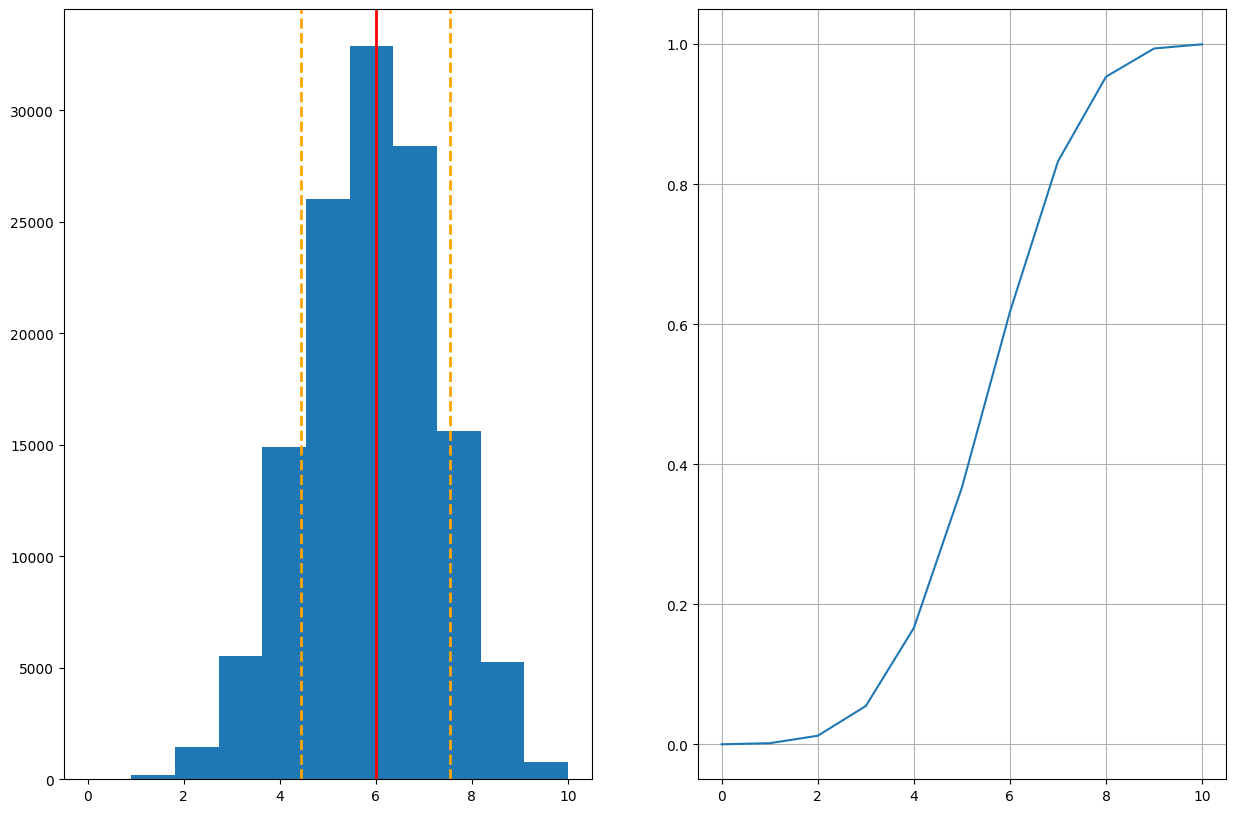

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
axes = axes.flatten()

cum_prob = np.cumsum(prob_array)

axes[0].hist(binomial_sample, bins=len(np.unique(binomial_sample)))
axes[0].axvline(binomial_sample.mean(), color='red', linestyle='-', linewidth=2)
axes[0].axvline(binomial_sample.mean() - binomial_sample.std(), color='orange', linestyle='--', linewidth=2)
axes[0].axvline(binomial_sample.mean() + binomial_sample.std(), color='orange', linestyle='--', linewidth=2)

axes[1].plot(cum_prob)
plt.grid()
plt.show()


### **The more numbers we sample, the more spreaded sum of them is (because of summing of individual independent variables variance), but distribution of those sums are is getting more and more normal** ###

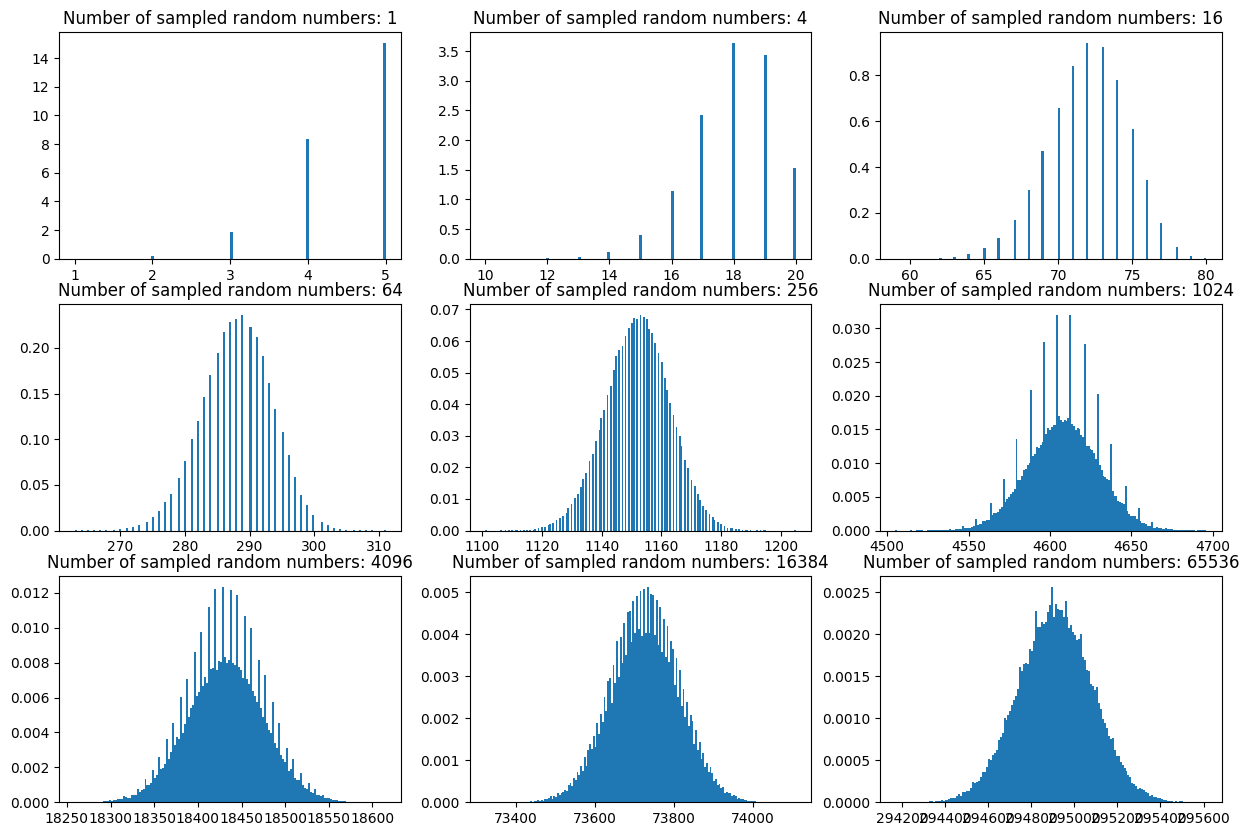

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

n_samples_lst = [2**(x*2) for x in range(10)]
n_repetitions = 2**17  # number of times we repeat the sampling experiment
n_outcomes = 5  # number of possible outcomes for each binomial trial (1, 2, 3, 4, 5)
p_success = 0.9  # probability of success for each binomial trial
sample_means = np.zeros([n_repetitions])  # array to store sample means for each experiment
samples_dict = {}

for i, ax in enumerate(axes):

    n_samples = n_samples_lst[i]  # count of numbers from the distribution to randomly sample
    for i in range(n_repetitions):
        # Sample n_samples (e.g. 1, 16, 256) random numbers from 5 available and sum them
        sample_means[i] = np.sum(np.random.binomial(n=n_outcomes, p=p_success, size=n_samples))

    samples_dict[n_samples] = sample_means
    ax.hist(sample_means, bins='auto', density=True)
    ax.set_title(f'Number of sampled random numbers: {n_samples}')

plt.show()


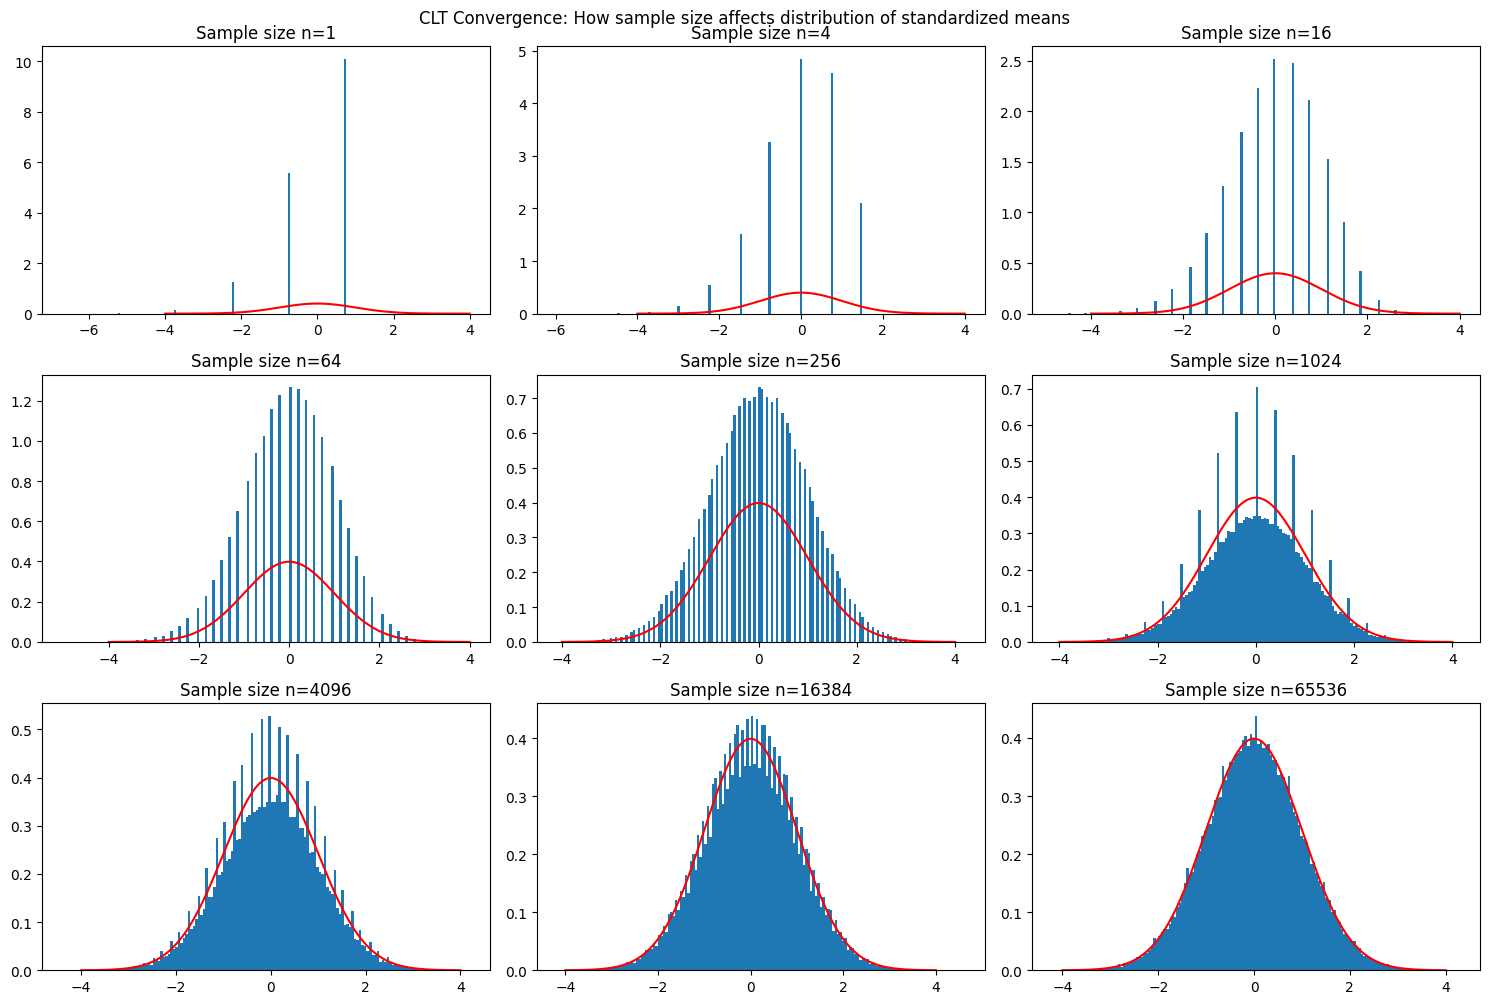

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# n_samples_lst = [2**(x*2) for x in range(10)]
# n_repetitions = 2**17  # number of times we repeat the sampling experiment
# n_outcomes = 5  # number of possible outcomes for each binomial trial (1, 2, 3, 4, 5)
# p_success = 0.9  # probability of success for each binomial trial
# sample_means = np.zeros([n_repetitions])  # array to store sample means for each experiment

for i, ax in enumerate(axes):

    n_samples = n_samples_lst[i]  # number of independent binomial samples to average in each experiment
    for j in range(n_repetitions):
        # Generate n_samples independent binomial random variables and compute their mean
        sample_means[j] = np.mean(np.random.binomial(n=n_outcomes, p=p_success, size=n_samples))
        
    # Standardize according to CLT: (X_mean - expected_value) / (sigma / sqrt(n)), 
    # where expected_value and sigma are given from distribution theory
    expected_value = n_outcomes * p_success
    sigma = n_outcomes*p_success * (1-p_success)
    # sample_means = samples_dict.get(n_samples) / n_repetitions

    standardized = (sample_means - expected_value) * np.sqrt(n_samples) / np.sqrt(sigma)
    
    ax.hist(standardized, bins='auto', density=True)
    ax.set_title(f'Sample size n={n_samples}')
    
    x_range = np.linspace(-4, 4, 1000)
    pdf = norm.pdf(x_range, 0, 1)
    ax.plot(x_range, pdf, color='red')

plt.tight_layout()
plt.suptitle('CLT Convergence: How sample size affects distribution of standardized means', y=1.00)
plt.show()
